In [ ]:
from lifelines.datasets import load_dd
from lifelines.utils import concordance_index
from matplotlib import pyplot as plt

from gbnet.models.survival import discrete_beta_survival


############## Load and format data
dd = load_dd()

categorical_cols = [
    'ctryname', 'cowcode2', 'politycode', 'un_region_name',
    'un_continent_name', 'democracy', 'regime',
]
continuous_cols = ['start_year']

for c in categorical_cols:
    dd[c] = dd[c].fillna('<NA>').astype('category')

train_df = dd[categorical_cols + continuous_cols].copy()
train_y = dd[['duration', 'observed']].rename(
    columns={'duration': 'time', 'observed': 'event'}
).copy()


############## Fit model
BSM = discrete_beta_survival.BetaSurvivalModel()
BSM.fit(train_df, train_y)

BetaSurvivalModel(nrounds=100, params={})

In [16]:
expected_survival_time = BSM.predict(train_df)
concordance_index(train_y['time'], expected_survival_time, train_y['event'] == 1)  

0.9933753368693753

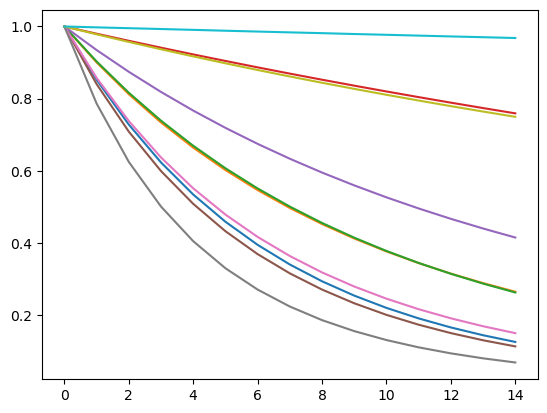

In [17]:
survival_probability = BSM.predict_survival(train_df, range(15))

for i in range(10):
    plt.plot(range(15), survival_probability[i,:])